In [ ]:
    import pandas as pd
    import numpy as np
    import keras
    import tensorflow as tf
    from keras.preprocessing.sequence import TimeseriesGenerator
    import matplotlib.pyplot as plt

In [ ]:
filename = "/content/NSE-TATAMOTORS.csv"
df = pd.read_csv(filename)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3973 entries, 0 to 3972
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   3973 non-null   object 
 1   Open                   3973 non-null   float64
 2   High                   3973 non-null   float64
 3   Low                    3973 non-null   float64
 4   Last                   3973 non-null   float64
 5   Close                  3973 non-null   float64
 6   Total Traded Quantity  3973 non-null   int64  
 7   Turnover               3973 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 248.4+ KB
None


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df.index=df['Date']
df.sort_index(ascending=True,axis=0, inplace=True)
df.set_axis(df['Date'], inplace=True)
df.drop(columns=['Open', 'High', 'Low', 'Total Traded Quantity', 'Turnover', 'Last'], inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3973 entries, 2006-07-17 to 2022-07-15
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    3973 non-null   datetime64[ns]
 1   Close   3973 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 93.1 KB


In [ ]:
look_back = 15

close_data = df['Close'].values
close_data = close_data.reshape((-1,1))

split_percent = 0.80
split = int(split_percent*len(close_data))

close_train = close_data[:split]
close_test = close_data[split - look_back:]

date_train = df['Date'][:split]
date_test = df['Date'][split:]

print(len(close_train))
print(len(close_test))

3178
810


In [ ]:
train_generator = TimeseriesGenerator(close_train, close_train, length=look_back, batch_size=20)      
test_generator = TimeseriesGenerator(close_test, close_test, length=look_back, batch_size=1)

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

model = Sequential()
model.add(LSTM(units=5, activation="relu",input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

num_epochs = 25
model.fit(train_generator, epochs=num_epochs, verbose=1)

Epoch 1/25
159/159 [==============================] - 4s 7ms/step - loss: 1052442.1250
Epoch 2/25
159/159 [==============================] - 1s 7ms/step - loss: 326181.3438
Epoch 3/25
159/159 [==============================] - 1s 7ms/step - loss: 326070.5312
Epoch 4/25
159/159 [==============================] - 1s 8ms/step - loss: 325949.6875
Epoch 5/25
159/159 [==============================] - 1s 7ms/step - loss: 325822.7812
Epoch 6/25
159/159 [==============================] - 1s 7ms/step - loss: 325691.7188
Epoch 7/25
159/159 [==============================] - 1s 7ms/step - loss: 325558.5000
Epoch 8/25
159/159 [==============================] - 1s 7ms/step - loss: 325424.0000
Epoch 9/25
159/159 [==============================] - 1s 7ms/step - loss: 325287.7812
Epoch 10/25
159/159 [==============================] - 1s 7ms/step - loss: 325150.7500
Epoch 11/25
159/159 [==============================] - 1s 7ms/step - loss: 325012.6250
Epoch 12/25
159/159 [==============================

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 5)                 140       
                                                                 
 dense (Dense)               (None, 1)                 6         
                                                                 
Total params: 146
Trainable params: 146
Non-trainable params: 0
_________________________________________________________________


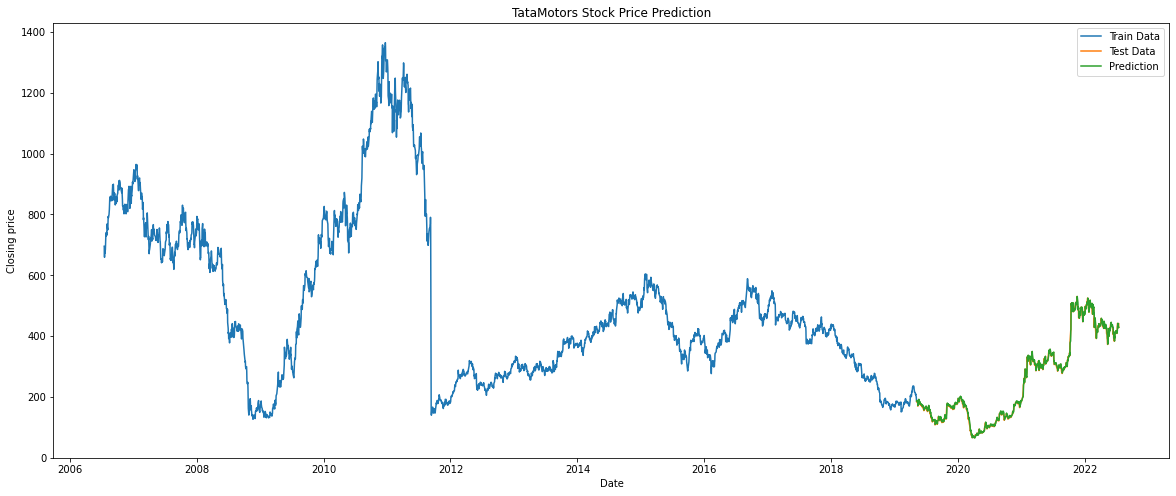

In [ ]:
prediction = model.predict(test_generator)

close_train = close_train.reshape((-1))
close_test = close_test.reshape((-1))
prediction = prediction.reshape((-1))

plt.figure(figsize=(20, 8))
plt.title("TataMotors Stock Price Prediction")
plt.xlabel("Date")
plt.ylabel("Closing price")
plt.plot(date_train, close_train, label="Train Data")
plt.plot(date_test, close_test[15:], label="Test Data")
plt.plot(date_test, prediction, label="Prediction")
plt.legend()

In [ ]:
model.save("stock_tm_lstm.h5")

In [ ]:
loaded_model = keras.models.load_model("/content/stock_tm_lstm.h5")

In [ ]:
loaded_pred = loaded_model.predict(test_generator)

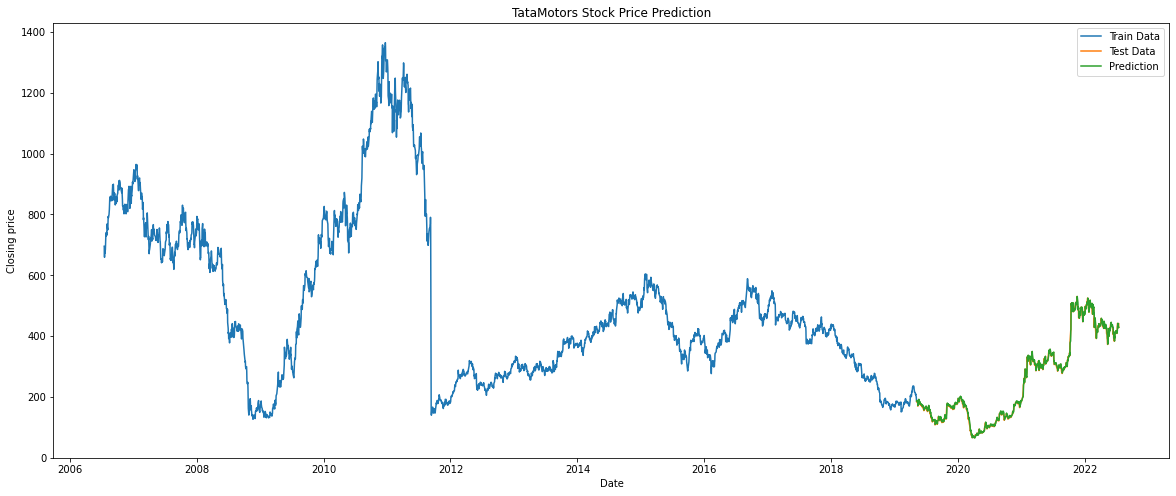

In [ ]:
plt.figure(figsize=(20, 8))
plt.title("TataMotors Stock Price Prediction")
plt.xlabel("Date")
plt.ylabel("Closing price")
plt.plot(date_train, close_train, label="Train Data")
plt.plot(date_test, close_test[15:], label="Test Data")
plt.plot(date_test, loaded_pred, label="Prediction")
plt.legend()